In [2]:
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
ds = xr.open_dataset("with/prog.nc")
ini = xr.open_dataset("with/MOM_IC.nc")

<xarray.DataArray 'e' ()>
array(0.001)
Coordinates:
    zi       float64 0.0


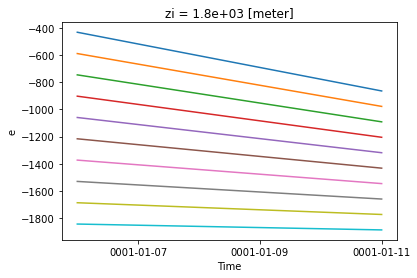

In [12]:
# Graph the depth of each layer over time
e = ds['e'].mean(['yh', 'xh'])
for z in range(0, ds['zi'].size-1):
    e.isel(zi=z).plot()
    
# Reverse engineer the value of w_otec.
print((e[0,0] - e[1,0])/(5*24*3600))

(2000.0, 0.0)

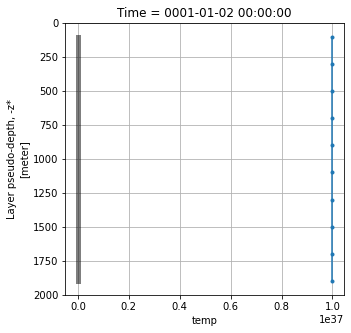

In [3]:
plt.figure(figsize=(5,5))

ini['Temp'].mean(['lath', 'lonh']).plot(y='Layer', color='k', lw=5., alpha=0.5)
for t in ds['Time']:
    ds['temp'].sel(Time=t).mean(['xh', 'yh']).plot(y='zl', marker=".")
plt.grid(True)
plt.ylim(2000, 0)